In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

tmp_n = 50

# 1. Generate synthetic data
np.random.seed(20250412)
X = 3 * (np.random.rand(tmp_n, 1)-0.5)  # 100 samples, 1 feature
true_slope = 3.5
true_intercept = 1.2
noise = 2 * np.random.randn(tmp_n, 1)
y = true_slope * X + true_intercept + noise  # y = 3.5x + 1.2 + noise



#y = true_slope * X**2 + true_intercept + noise

# Simulation

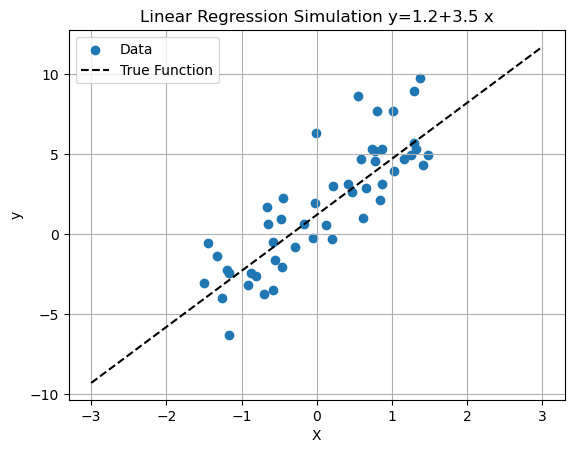

In [30]:
# 3. Make predictions
X_new = np.linspace(-3, 3, 1000).reshape(-1,1)
y_true = true_slope * X_new + true_intercept

# 4. Visualize
plt.scatter(X, y, label="Data")
plt.plot(X_new, y_true, 'k--', label="True Function")
plt.title("Linear Regression Simulation y=1.2+3.5 x")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Linear Regression

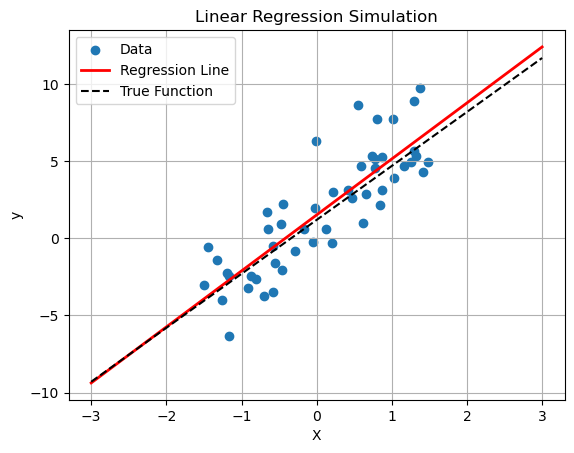

In [31]:
# 2. Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# 3. Make predictions
X_new = np.linspace(-3, 3, 1000).reshape(-1,1)
y_pred = model.predict(X_new)
y_true = true_slope * X_new + true_intercept

# 4. Visualize
plt.scatter(X, y, label="Data")
plt.plot(X_new, y_pred, color='red', linewidth=2, label="Regression Line")
plt.plot(X_new, y_true, 'k--', label="True Function")
plt.title("Linear Regression Simulation")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Tree Model

In [32]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor()
model_tree.fit(X,y)



# 3. Make predictions
y_pred_tree = model_tree.predict(X_new)


In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2 , 3, 4, 5, 6, 10],
    'min_samples_split': [2, 4, 8, 16, 32],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

grid_search_tree = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search_tree.fit(X, y)


print(grid_search_tree.best_params_)
print(grid_search_tree.best_score_)

y_pred_tree_GridSearch = grid_search_tree.predict(X_new)

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.582985342525715


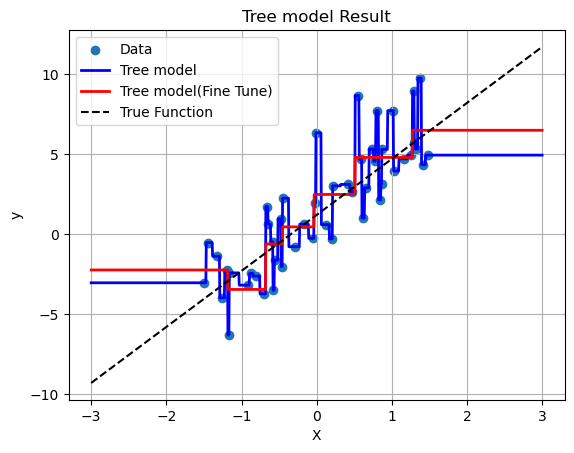

In [34]:
# 4. Visualize
plt.scatter(X, y, label="Data")
plt.plot(X_new, y_pred_tree, color='blue', linewidth=2, label="Tree model")
plt.plot(X_new, y_pred_tree_GridSearch, color='red', linewidth=2, label="Tree model(Fine Tune)")
plt.plot(X_new, y_true, 'k--', label="True Function")
plt.title("Tree model Result")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Random Forest

In [35]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X,y)

# 3. Make predictions
y_pred_rf = model_rf.predict(X_new)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [30, 50, 100, 200, 300],
    'max_depth': [1, 2, 3, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 5]
}

grid_search_rf = GridSearchCV(
    RandomForestRegressor(oob_score=True, random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search_rf.fit(X, y)


print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)


y_pred_rf_GridSearch = grid_search_rf.predict(X_new)

{'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 50}
0.6141446950952101


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


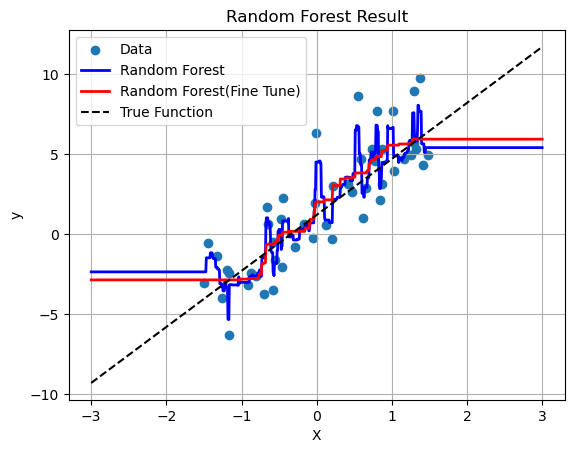

In [37]:
# 4. Visualize
plt.scatter(X, y, label="Data")
plt.plot(X_new, y_pred_rf, color='blue', linewidth=2, label="Random Forest")
plt.plot(X_new, y_pred_rf_GridSearch, color='red', linewidth=2, label="Random Forest(Fine Tune)")
plt.plot(X_new, y_true, 'k--', label="True Function")
plt.title("Random Forest Result")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Boosting

In [38]:
model_boost = GradientBoostingRegressor(random_state=42)
model_boost.fit(X,y)

# 3. Make predictions
y_pred_boost = model_boost.predict(X_new)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [39]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 2, 3, 4, 5]
}

grid_search_boost = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_boost.fit(X, y)

print(grid_search_boost.best_params_)

# 3. Make predictions
y_pred_boost_GridSearch = grid_search_boost.predict(X_new)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
-5.353032258251609


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


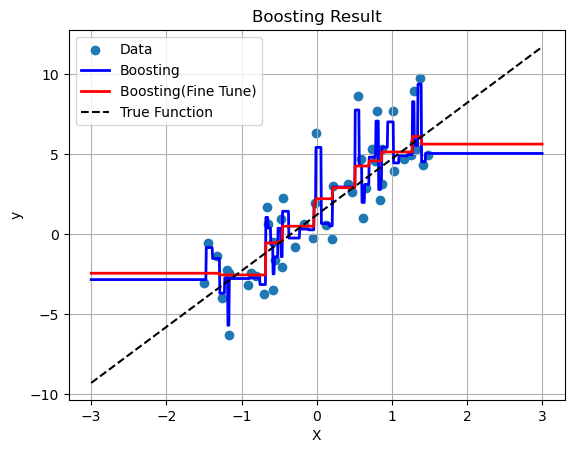

In [40]:
# 4. Visualize
plt.scatter(X, y, label="Data")
plt.plot(X_new, y_pred_boost, color='blue', linewidth=2, label="Boosting")
plt.plot(X_new, y_pred_boost_GridSearch, color='red', linewidth=2, label="Boosting(Fine Tune)")
plt.plot(X_new, y_true, 'k--', label="True Function")
plt.title("Boosting Result")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Multilayer perceptron (Deep learning model)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


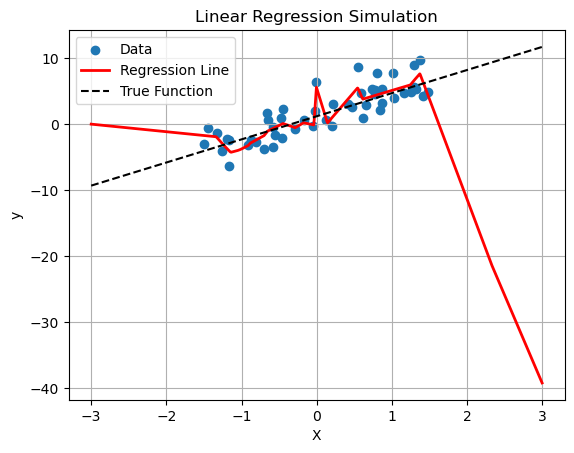

In [41]:
from sklearn.neural_network import MLPRegressor

model_MLP = MLPRegressor(hidden_layer_sizes = (20, 20, 20), activation = "relu", max_iter = 10000000, random_state = 42)
model_MLP.fit(X,y)

# 3. Make predictions
y_pred_MLP = model_MLP.predict(X_new)

# 4. Visualize
plt.scatter(X, y, label="Data")
plt.plot(X_new,  y_pred_MLP, color='red', linewidth=2, label="Regression Line")
plt.plot(X_new, y_true, 'k--', label="True Function")
plt.title("Linear Regression Simulation")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



# Appendix

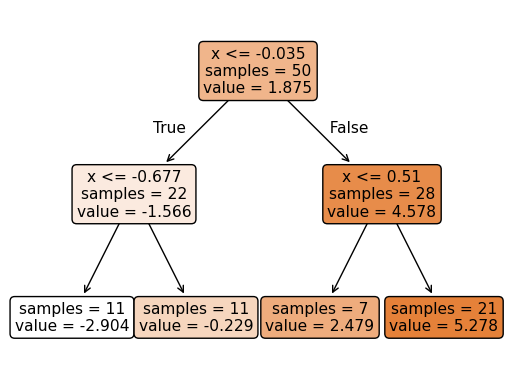

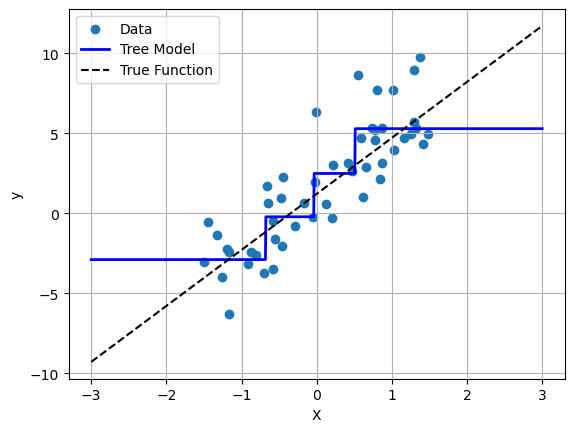

In [42]:
from sklearn.tree import DecisionTreeRegressor
model_tree_test = DecisionTreeRegressor(max_depth = 2)
model_tree_test.fit(X,y)


from sklearn.tree import plot_tree


plot_tree(model_tree_test, filled=True, feature_names=["x"], rounded=True, impurity = False)
plt.show()


y_pred_tree_test = model_tree_test.predict(X_new)


plt.scatter(X, y, label="Data")
plt.plot(X_new, y_pred_tree_test, color='blue', linewidth=2, label="Tree Model")
plt.plot(X_new, y_true, 'k--', label="True Function")
plt.title("")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
